In [1]:
# Name: Manisha Lakkarsu
# id: 700746573

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics ='accuracy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(a_train, b_train), (a_test, b_test) = fashion_mnist.load_data()
a_train = a_train.astype('float32') / 255.
a_test = a_test.astype('float32') / 255.
a_train = a_train.reshape((len(a_train), np.prod(a_train.shape[1:])))
a_test = a_test.reshape((len(a_test), np.prod(a_test.shape[1:])))

autoencoder.fit(a_train, a_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(a_test, a_test))



Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6956 - accuracy: 0.0022 - val_loss: 0.6954 - val_accuracy: 0.0021
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6953 - accuracy: 0.0022 - val_loss: 0.6952 - val_accuracy: 0.0022
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6950 - accuracy: 0.0023 - val_loss: 0.6949 - val_accuracy: 0.0022
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6948 - accuracy: 0.0023 - val_loss: 0.6946 - val_accuracy: 0.0023
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.0024 - val_loss: 0.6944 - val_accuracy: 0.0025


In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded2)

# This is our decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics ='accuracy')

# Load the MNIST dataset
from keras.datasets import mnist, fashion_mnist
import numpy as np
(a_train, b_train), (a_test, b_test) = fashion_mnist.load_data()

# Normalize and flatten the data
a_train = a_train.astype('float32') / 255.
a_test = a_test.astype('float32') / 255.
a_train = a_train.reshape((len(a_train), np.prod(a_train.shape[1:])))
a_test = a_test.reshape((len(a_test), np.prod(a_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(a_train, a_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(a_test, a_test))


Epoch 1/5
235/235 [==============================] - 3s 8ms/step - loss: 0.6950 - accuracy: 9.6667e-04 - val_loss: 0.6950 - val_accuracy: 0.0012
Epoch 2/5
235/235 [==============================] - 2s 6ms/step - loss: 0.6949 - accuracy: 9.5000e-04 - val_loss: 0.6948 - val_accuracy: 0.0013
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6948 - accuracy: 0.0010 - val_loss: 0.6947 - val_accuracy: 0.0013
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6946 - accuracy: 0.0011 - val_loss: 0.6946 - val_accuracy: 0.0014
Epoch 5/5
235/235 [==============================] - 2s 6ms/step - loss: 0.6945 - accuracy: 0.0011 - val_loss: 0.6945 - val_accuracy: 0.0015


313/313 [==============================] - 0s 1ms/step


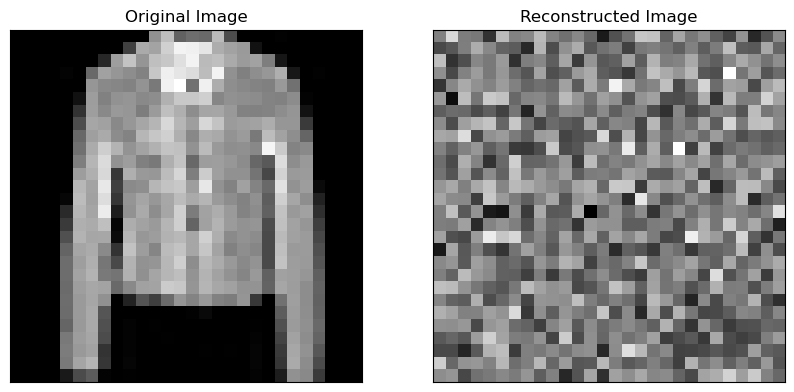

In [10]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(a_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(a_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics ='accuracy')
from keras.datasets import fashion_mnist
import numpy as np
(a_train, _), (a_test, _) = fashion_mnist.load_data()
a_train = a_train.astype('float32') / 255.
a_test = a_test.astype('float32') / 255.
a_train = a_train.reshape((len(a_train), np.prod(a_train.shape[1:])))
a_test = a_test.reshape((len(a_test), np.prod(a_test.shape[1:])))

#introducing noise
noise_factor = 0.5
a_train_noisy = a_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=a_train.shape)
a_test_noisy = a_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=a_test.shape)

autoencoder.fit(a_train_noisy, a_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(a_test_noisy, a_test_noisy))


Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.6978 - accuracy: 7.5000e-04 - val_loss: 0.6975 - val_accuracy: 0.0010
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6974 - accuracy: 7.6667e-04 - val_loss: 0.6972 - val_accuracy: 0.0010
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6971 - accuracy: 8.0000e-04 - val_loss: 0.6968 - val_accuracy: 0.0010
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6967 - accuracy: 8.3333e-04 - val_loss: 0.6965 - val_accuracy: 0.0011
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6964 - accuracy: 8.6667e-04 - val_loss: 0.6962 - val_accuracy: 0.0011
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6961 - accuracy: 9.3333e-04 - val_loss: 0.6959 - val_accuracy: 0.0011
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6958 - accuracy: 9.3333e-04 - val_loss: 0.6956 -

313/313 [==============================] - 0s 1ms/step


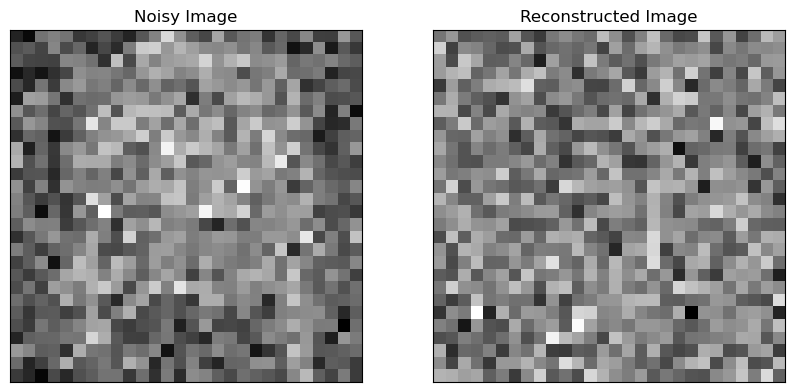

In [13]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_image = autoencoder.predict(a_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6948 - accuracy: 0.0011 - val_loss: 0.6946 - val_accuracy: 0.0012
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6945 - accuracy: 0.0011 - val_loss: 0.6943 - val_accuracy: 0.0013
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6943 - accuracy: 0.0011 - val_loss: 0.6941 - val_accuracy: 0.0014
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6940 - accuracy: 0.0011 - val_loss: 0.6938 - val_accuracy: 0.0014
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.0012 - val_loss: 0.6936 - val_accuracy: 0.0014
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.0012 - val_loss: 0.6934 - val_accuracy: 0.0015
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.0012 - val_loss: 0.6932 - val_accuracy: 0.0014
Epoch 

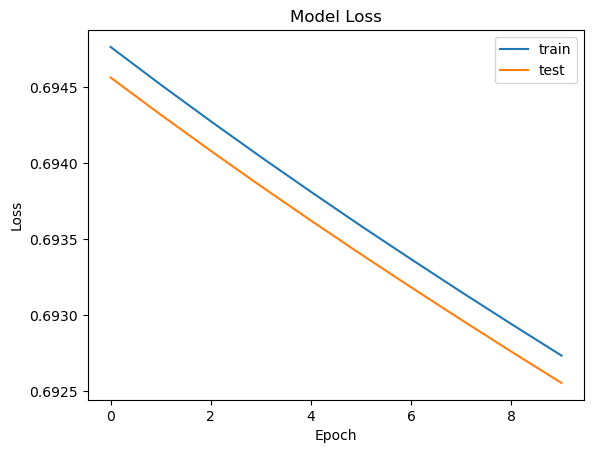

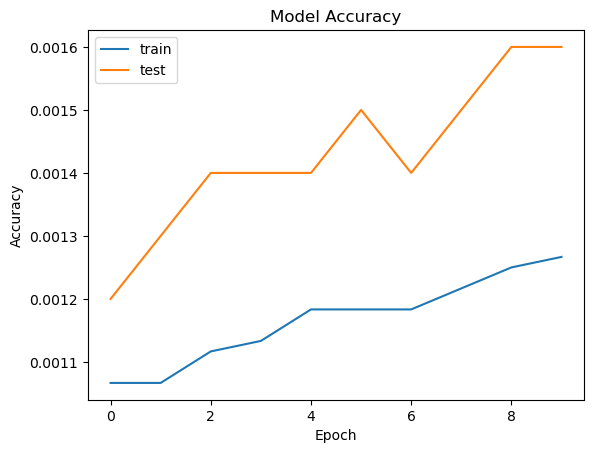

In [14]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(a_train_noisy, a_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(a_test_noisy, a_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
